In [1]:
# =========== IMPORT LIBRARIES ===========

#install.packages(c("MCMCpack","ggplot2","gridExtra","corrplot","caret","rstanarm"))
library(caret)
library(MCMCpack)
library(rstanarm)
library(GGally)
library(ggplot2)
library(gridExtra)
library(corrplot)
library(reshape2)
library(RColorBrewer)
library(bayesplot)
library(cowplot)
library(dplyr)
library(glmnet)
library(plotmo)
library(BayesVarSel)

Loading required package: ggplot2

Loading required package: lattice

Loading required package: coda

Loading required package: MASS

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2024 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##

Loading required package: Rcpp

This is rstanarm version 2.32.1

- See https://mc-stan.org/rstanarm/articles/priors for changes to default priors!

- Default priors may change, so it's safest to specify priors, even if equivalent to the defaults.

- For execution on a local, multicore CPU with excess RAM we recommend calling

  options(mc.cores = parallel::detectCores())


Attaching package: 'rstanarm'


The following objects are masked from 'package:caret':

    compare_models, R2


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

corrplot 0.92 loaded

This is bayesplot version 1.11.1

-

In [2]:
# =========== READ DATA ===========
housing <- read.csv("data/housing_light_preprocessing.csv")

# look at the data
head(housing)
dim(housing)
summary(housing)


,X,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_.1H.OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR.BAY,ocean_proximity_NEAR.OCEAN
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,0,0.2111554,0.5674814,0.7843137,0.02233074,0.01986344,0.008940834,0.02055583,0.5396684,452600,0,0,0,1,0
2,1,0.2121514,0.5653560,0.3921569,0.18050257,0.17147734,0.067210404,0.18697583,0.5380271,358500,0,0,0,1,0
3,2,0.2101594,0.5642933,1.0000000,0.03726029,0.02932961,0.013817652,0.02894261,0.4660281,352100,0,0,0,1,0
4,3,0.2091633,0.5642933,1.0000000,0.03235159,0.03631285,0.015555369,0.03584937,0.3546986,341300,0,0,0,1,0
5,4,0.2091633,0.5642933,1.0000000,0.04132967,0.04329609,0.015751563,0.04242723,0.2307761,342200,0,0,0,1,0
6,5,0.2091633,0.5642933,1.0000000,0.02332265,0.03289882,0.011491353,0.03157375,0.2439208,269700,0,0,0,1,0


[1] 20433    15

       X           longitude         latitude      housing_median_age
 Min.   :    0   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000    
 1st Qu.: 5162   1st Qu.:0.2540   1st Qu.:0.1477   1st Qu.:0.3333    
 Median :10319   Median :0.5837   Median :0.1828   Median :0.5490    
 Mean   :10316   Mean   :0.4760   Mean   :0.3287   Mean   :0.5418    
 3rd Qu.:15473   3rd Qu.:0.6315   3rd Qu.:0.5505   3rd Qu.:0.7059    
 Max.   :20639   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000    
  total_rooms      total_bedrooms      population        households     
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.03683   1st Qu.:0.04578   1st Qu.:0.02197   1st Qu.:0.04588  
 Median :0.05405   Median :0.06735   Median :0.03260   Median :0.06709  
 Mean   :0.06700   Mean   :0.08331   Mean   :0.03985   Mean   :0.08197  
 3rd Qu.:0.07989   3rd Qu.:0.10025   3rd Qu.:0.04818   3rd Qu.:0.09916  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  


Call:
lm(formula = median_house_value ~ ., data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-562919  -42437  -10868   29070  771236 

Coefficients: (1 not defined because of singularities)
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 2.352e+05  8.439e+03  27.865  < 2e-16 ***
X                           8.044e-01  8.884e-02   9.054  < 2e-16 ***
longitude                  -2.508e+05  1.042e+04 -24.076  < 2e-16 ***
latitude                   -2.279e+05  9.527e+03 -23.917  < 2e-16 ***
housing_median_age          5.763e+04  2.257e+03  25.534  < 2e-16 ***
total_rooms                -2.532e+05  3.108e+04  -8.148 3.91e-16 ***
total_bedrooms              6.454e+05  4.417e+04  14.610  < 2e-16 ***
population                 -1.351e+06  3.832e+04 -35.255  < 2e-16 ***
households                  3.113e+05  4.523e+04   6.882 6.05e-12 ***
median_income               5.684e+05  4.892e+03 116.180  < 2e-16 ***
ocean_proximity_.1H.

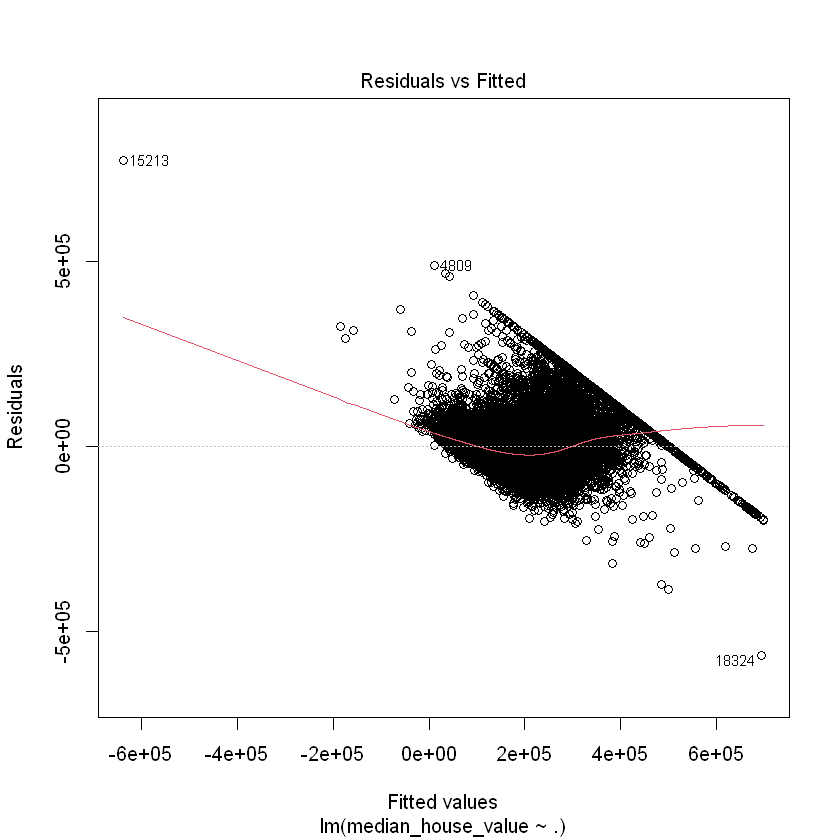

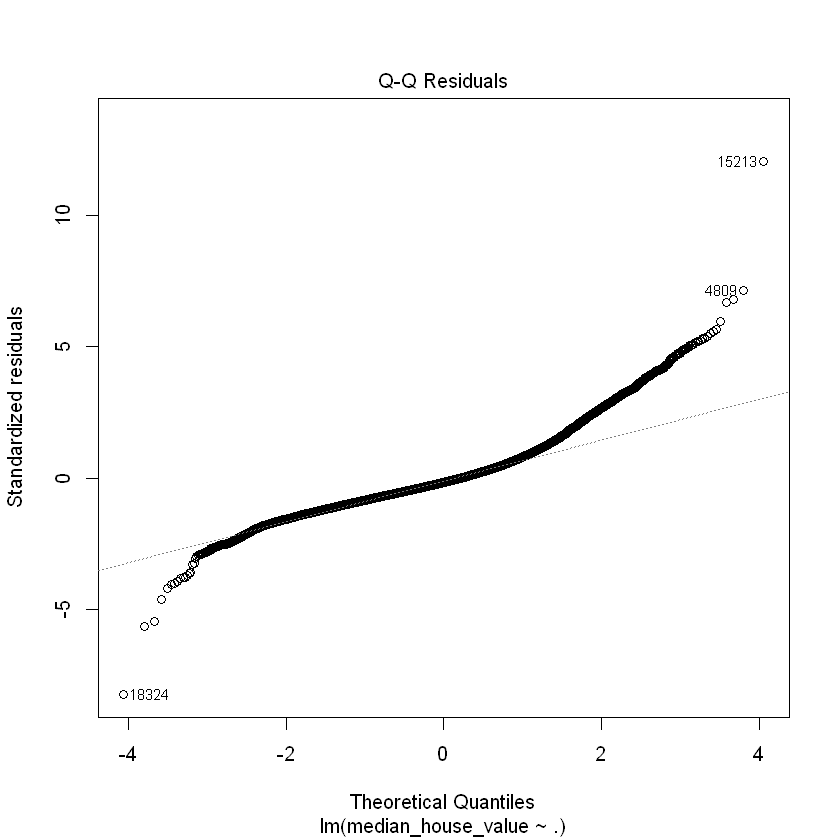

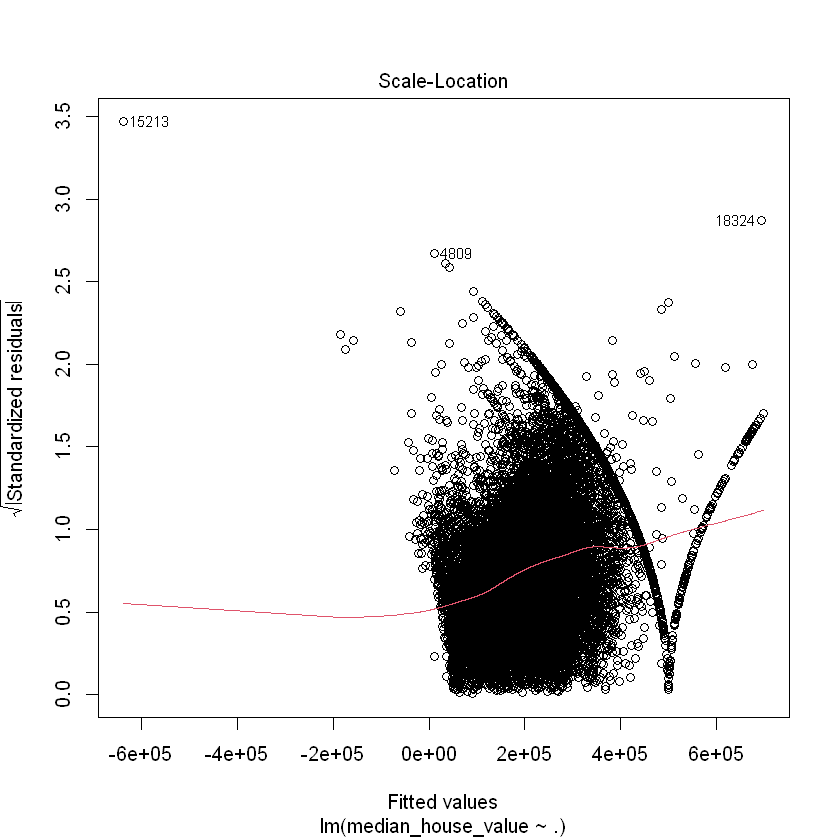

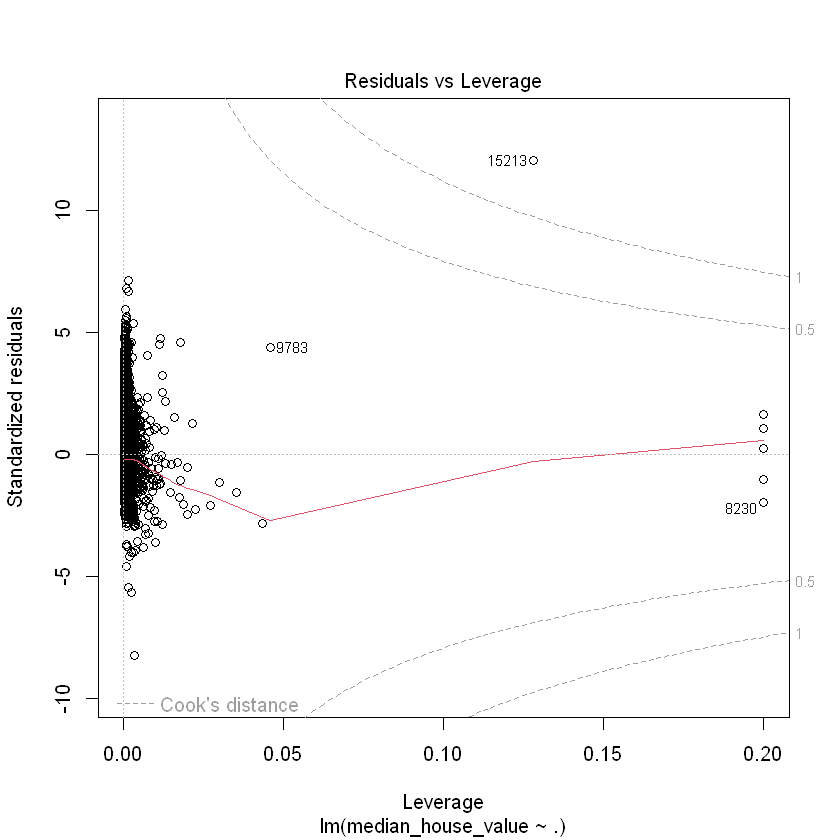

In [3]:
# =========== LINEAR REGRESSION ===========
m1 <- lm(median_house_value	 ~ ., data = housing)
summary(m1)
plot(m1)


Call:
lm(formula = median_house_value ~ ., data = housing_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-555055  -42605  -10545   28817  782286 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              260950       7954  32.806  < 2e-16 ***
longitude               -272914       9911 -27.535  < 2e-16 ***
latitude                -246511       9257 -26.631  < 2e-16 ***
housing_median_age        53488       2200  24.318  < 2e-16 ***
total_rooms             -239070      31076  -7.693  1.5e-14 ***
total_bedrooms           650861      44264  14.704  < 2e-16 ***
population             -1358947      38209 -35.566  < 2e-16 ***
households               294737      45328   6.502  8.1e-11 ***
median_income            567719       4885 116.214  < 2e-16 ***
ocean_proximity_INLAND   -38748       1714 -22.610  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68720 on 20423 degrees of f

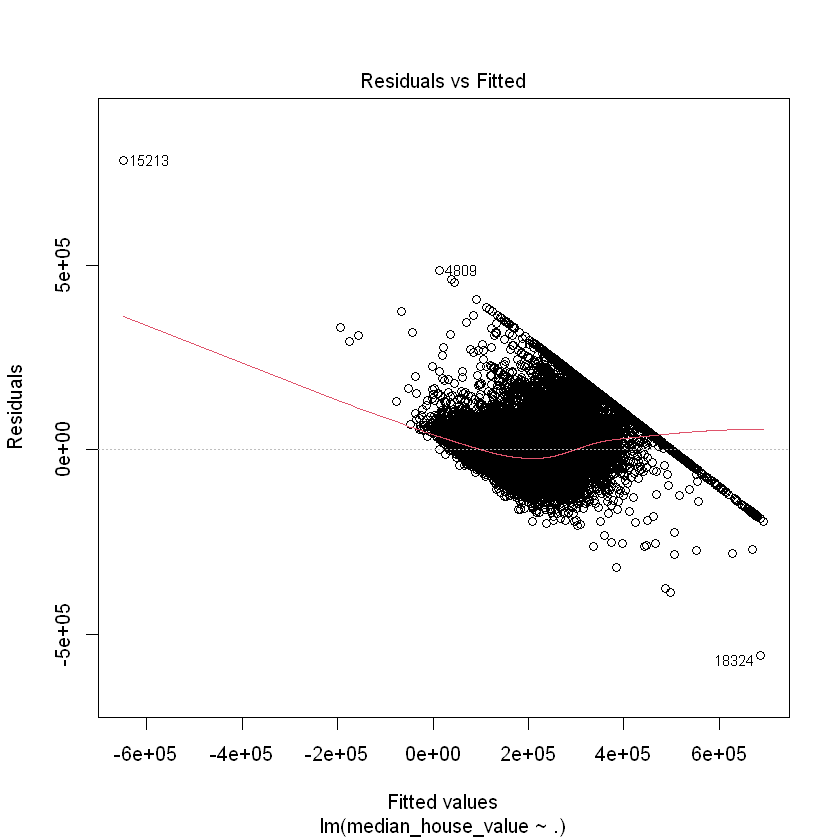

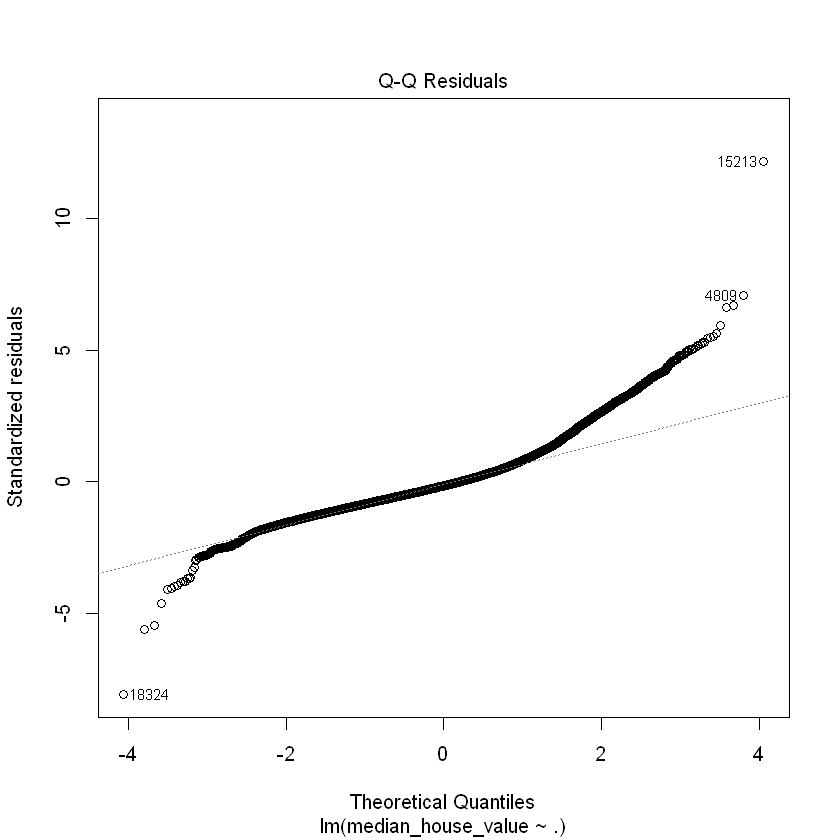

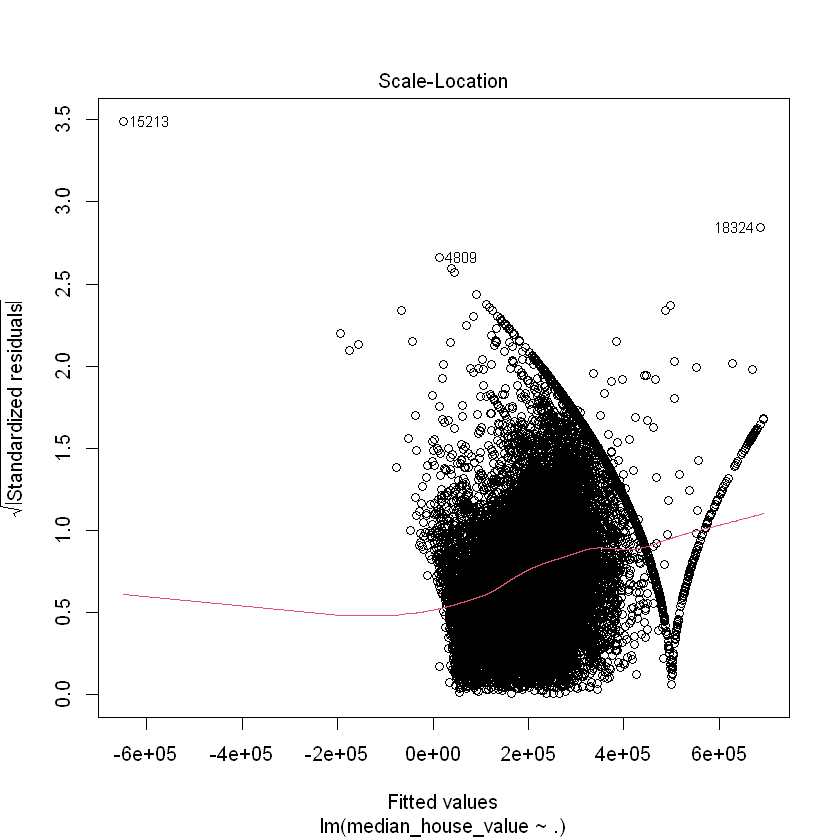

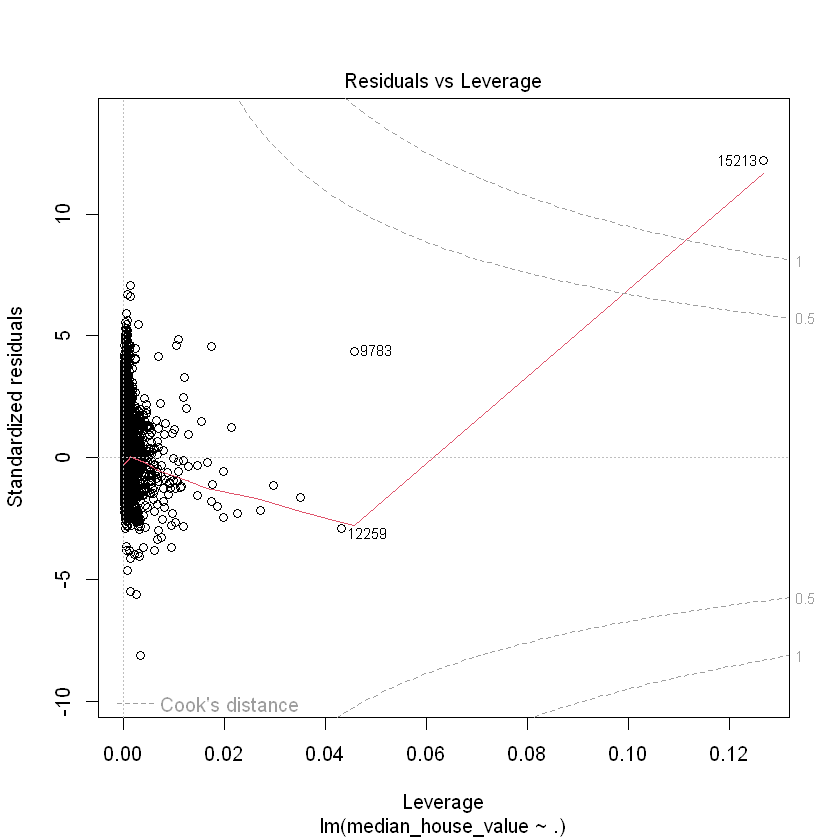

In [4]:
housing_subset<-housing[,c('longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity_INLAND')]

m1 <- lm(median_house_value	 ~ ., data = housing_subset)
summary(m1)
plot(m1)

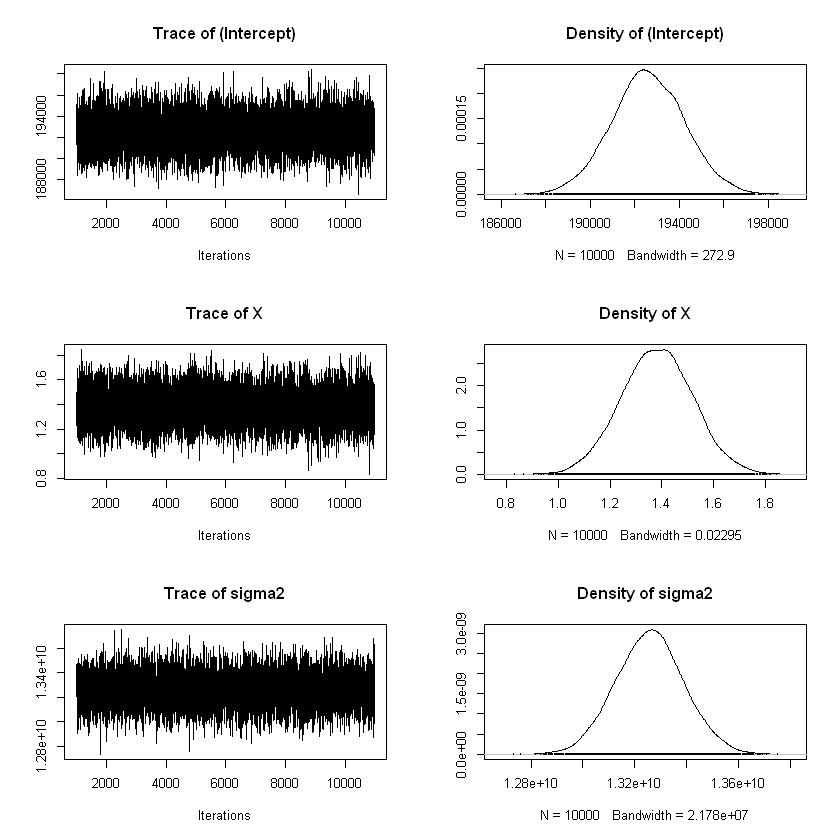

In [5]:

X <- as.matrix(housing[,c('longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity_INLAND')])
post.reg1 <- MCMCregress(median_house_value ~ X, data = housing,  seed = 1234567)  
plot(post.reg1)  ## trace plots and kernel density plots

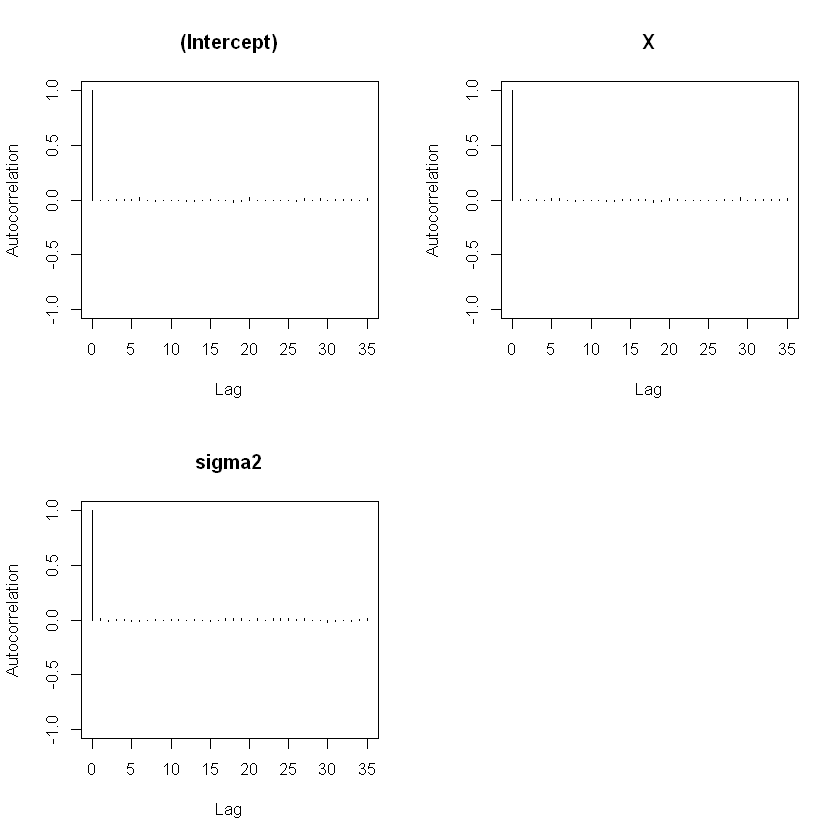

In [6]:
autocorr.plot(post.reg1) 

In [7]:
effectiveSize(post.reg1)

(Intercept)           X      sigma2 
  10000.000   10000.000    9670.078

In [8]:
post.reg2 <- MCMCregress(median_house_value ~ X, data = housing,  seed = 121234)  

# do a few more (uncomment and complete the below, changing the seed each time)
post.reg3 <- MCMCregress(median_house_value ~ X, data = housing,  seed = 131313)  
post.reg4 <- MCMCregress(median_house_value ~ X, data = housing,  seed = 13131313)  
post.reg5 <- MCMCregress(median_house_value ~ X, data = housing,  seed = 1313131313)  

postreg.list <- mcmc.list(post.reg1,post.reg2,post.reg3,post.reg4,post.reg5) # add the others here! 
gelman.diag(postreg.list)

Potential scale reduction factors:

            Point est. Upper C.I.
(Intercept)          1          1
X                    1          1
sigma2               1          1

Multivariate psrf

1

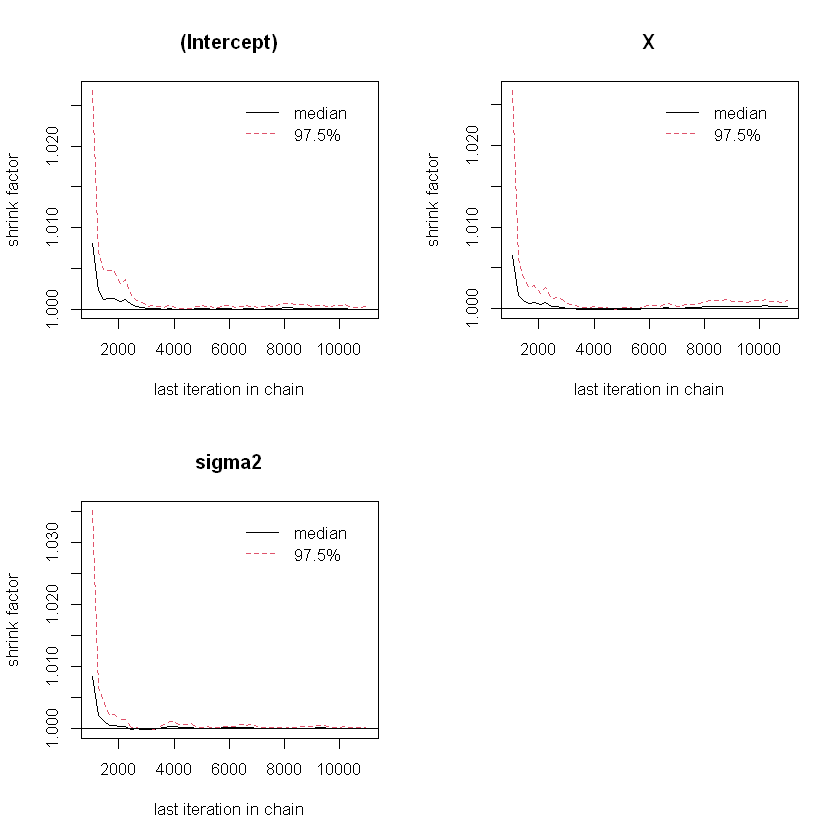

In [9]:
gelman.plot(postreg.list)

In [10]:
summary(postreg.list)



Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 5 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                 Mean        SD  Naive SE Time-series SE
(Intercept) 1.926e+05 1.616e+03 7.227e+00      7.293e+00
X           1.382e+00 1.359e-01 6.079e-04      6.106e-04
sigma2      1.326e+10 1.308e+08 5.848e+05      5.840e+05

2. Quantiles for each variable:

                 2.5%       25%       50%       75%     97.5%
(Intercept) 1.894e+05 1.915e+05 1.926e+05 1.937e+05 1.958e+05
X           1.115e+00 1.290e+00 1.382e+00 1.474e+00 1.650e+00
sigma2      1.300e+10 1.317e+10 1.326e+10 1.335e+10 1.352e+10


In [11]:
X <- as.matrix(housing[,c('longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value')])
V <- 1/100
model1 <- MCMCregress(median_house_value  ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income+ocean_proximity_INLAND,data=housing,B0=V,marginal.likelihood="Laplace",  seed = 1234567)
summary(model1)



Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                            Mean        SD  Naive SE Time-series SE
(Intercept)            7.437e+00 1.003e+01 1.003e-01      1.003e-01
longitude              3.417e+00 9.948e+00 9.948e-02      9.948e-02
latitude               2.291e+00 1.001e+01 1.001e-01      9.731e-02
housing_median_age     4.197e+00 9.953e+00 9.953e-02      9.953e-02
total_rooms            7.348e-01 9.959e+00 9.959e-02      9.810e-02
total_bedrooms         3.706e-01 1.007e+01 1.007e-01      9.842e-02
population             4.406e-01 1.007e+01 1.007e-01      9.816e-02
households             6.495e-01 1.009e+01 1.009e-01      1.009e-01
median_income          2.076e+00 9.987e+00 9.987e-02      1.030e-01
ocean_proximity_INLAND 1.410e+00 1.006e+01 1.006e-01      1.030e-01
sigma2                 5.613e+10 5.561e+08 5.561e+06 

In [12]:
V <- 1/100

# Ajustar el modelo 1: todos los predictores
model2 <- MCMCregress(median_house_value ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income, data = housing, B0 = V, marginal.likelihood = "Laplace")

# Ajustar el modelo 2: un subconjunto de predictores
model3 <- MCMCregress(median_house_value ~ longitude + latitude + housing_median_age + total_rooms + median_income, data = housing, B0 = V, marginal.likelihood = "Laplace")

# Ajustar el modelo 3: otro subconjunto de predictores
model4 <- MCMCregress(median_house_value ~ longitude + latitude + total_rooms + median_income, data = housing, B0 = V, marginal.likelihood = "Laplace")

# Calcular el Factor Bayesiano entre los modelos
BF <- BayesFactor(model1, model2, model3,model4)
print(BF)

The matrix of Bayes Factors is:
       model1 model2 model3 model4
model1  1.000  0.891  0.895   1.00
model2  1.123  1.000  1.005   1.13
model3  1.117  0.995  1.000   1.12
model4  0.997  0.888  0.893   1.00

The matrix of the natural log Bayes Factors is:
         model1   model2   model3  model4
model1  0.00000 -0.11575 -0.11082 0.00264
model2  0.11575  0.00000  0.00494 0.11839
model3  0.11082 -0.00494  0.00000 0.11346
model4 -0.00264 -0.11839 -0.11346 0.00000

 model1 :
   call = 
MCMCregress(formula = median_house_value ~ longitude + latitude + 
    housing_median_age + total_rooms + total_bedrooms + population + 
    households + median_income + ocean_proximity_INLAND, data = housing, 
    seed = 1234567, B0 = V, marginal.likelihood = "Laplace")

   log marginal likelihood =  -281869.8 


 model2 :
   call = 
MCMCregress(formula = median_house_value ~ longitude + latitude + 
    housing_median_age + total_rooms + total_bedrooms + population + 
    households + median_income, data =

###General Interpretation

The Bayes factors and log-Bayes factors indicate that model2 and model3 are slightly more probable than model1 and model4, but the differences are very small.

Model2 and model3 have the highest (least negative) log-marginal likelihoods, suggesting that these models fit the data better compared to the other models.

Values close to 1 in the Bayes factors matrix and values close to 0 in the log-Bayes factors matrix indicate that there are no significant differences between the compared models.

In summary, although there are slight differences in the relative probability of the models, all of them are quite similar in terms of their fit to the data.

In [13]:

# Run into a problem running
bvs1 <- Bvs(formula = "median_house_value ~ .", 
            data = housing_subset, 
            n.keep = 2)

Info. . . .
Most complex model has 10 covariates
From those 1 is fixed and we should select from the remaining 9 
longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity_INLAND
The problem has a total of 512 competing models
Of these, the  2 most probable (a posteriori) are kept
Working on the problem...please wait.


ERROR: Error in myfun(c(1, (2^p - 1)), method = method): A Bayes factor is infinite.


In [14]:
### We check for aliased predictors so it could be interfering the model selection
library(car)
predictors <- c("longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "ocean_proximity_INLAND")

# Create a linear model using all predictors
model <- lm(median_house_value ~ ., data = housing_subset)

print(coefficients(model))

# Identify the predictors with aliased coefficients
aliased_predictors <- names(coefficients(model))[is.na(coefficients(model))]

# Print the names of predictors with aliased coefficients
print(aliased_predictors)


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:rstanarm':

    logit




           (Intercept)              longitude               latitude 
             260949.65             -272913.52             -246510.71 
    housing_median_age            total_rooms         total_bedrooms 
              53487.58             -239069.76              650860.92 
            population             households          median_income 
           -1358947.30              294736.87              567719.44 
ocean_proximity_INLAND 
             -38748.09 
character(0)


In [15]:
### Removing ocean proximity


housing_without_near_ocean <- housing[, -which(names(housing) == "ocean_proximity_NEAR.OCEAN")]

model <- lm(median_house_value ~ ., data = housing_without_near_ocean)

# Recompute VIF values
vif_values <- car::vif(model)

# Print VIF values
print(vif_values)

                        X                 longitude                  latitude 
                 1.218745                 18.806207                 20.358364 
       housing_median_age               total_rooms            total_bedrooms 
                 1.351484                 12.981852                 36.311405 
               population                households             median_income 
                 6.446940                 35.192712                  1.787059 
ocean_proximity_.1H.OCEAN    ocean_proximity_INLAND    ocean_proximity_ISLAND 
                 2.748524                  4.776843                  1.003182 
 ocean_proximity_NEAR.BAY 
                 2.261387 


We reduce the points and the predictors tryng to avoid a bayes factor became infinite

In [ ]:

library(BayesVarSel)

housing_subset <- housing[-(1:5000), ]

# Using just a few predictors
predictors <- c("ocean_proximity_ISLAND")
housing_scaled <- housing_subset


bvs1 <- Bvs(formula = "median_house_value ~ .", data = housing_scaled, n.keep = 5)

# Check results
summary(bvs1)


#Still error....

Info. . . .
Most complex model has 15 covariates
From those 1 is fixed and we should select from the remaining 14 
X, longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity_.1H.OCEAN, ocean_proximity_INLAND, ocean_proximity_ISLAND, ocean_proximity_NEAR.BAY, ocean_proximity_NEAR.OCEAN
The problem has a total of 16384 competing models
Of these, the  5 most probable (a posteriori) are kept
Working on the problem...please wait.


ERROR: Error in myfun(c(1, (2^p - 1)), method = method): A Bayes factor is infinite.


In [ ]:
bvs1 <- Bvs(formula="median_house_value ~ .",data=housing[,c("longitude","latitude","median_house_value")],prior.betas="gZellner",n.keep=1)
#and again...

Info. . . .
Most complex model has 3 covariates
From those 1 is fixed and we should select from the remaining 2 
longitude, latitude
The problem has a total of 4 competing models
Of these, the  1 most probable (a posteriori) are kept
Working on the problem...please wait.


ERROR: Error in myfun(c(1, (2^p - 1)), method = method): A Bayes factor is infinite.


Trying to check manually by tryng all combinations of predictors...

In [16]:

variables_predictoras <- c("longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income", "ocean_proximity_INLAND")


num_variables <- length(variables_predictoras)


lista_modelos <- list()


lista_formulas <- character()



for (longitud_combinacion in 7:num_variables) {
  # Genera todas las combinaciones de la longitud actual
  combinaciones <- combn(variables_predictoras, longitud_combinacion)
  

  for (i in 1:ncol(combinaciones)) {

    formula_modelo <- as.formula(paste("median_house_value ~", paste(combinaciones[, i], collapse = " + ")))
    

    lista_formulas <- c(lista_formulas, deparse(formula_modelo))

    aux <- MCMCregress(formula_modelo, data = housing, B0 = V, marginal.likelihood = "Laplace")
    lista_modelos[[length(lista_modelos) + 1]] <- aux

    cat("Modelo con combinación:", paste(combinaciones[, i], collapse = ", "), "\n")
    print(lista_modelos[[length(lista_modelos)]])
  }
}




In [ ]:
# Utiliza la función BayesFactor para comparar los modelos
BF <- BayesFactor(lista_modelos)

# Imprime el resultado de la comparación
print(BF)
